<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW1/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 1: LOGISTIC REGRESSION IMPLEMENTATION



## MACHINE LEARNING PROBLEM

- Heart disease introduction
- Why I am using Logistic regression to solve this problem

## EXPLORATORY DATA ANALYSIS

- Data set source
- Exploratory data analysis 
- Data visualization

## Data Exploration

In [3]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
import time



In [5]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}

df = df.replace({'Heart_Disease': mapping})
y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
        'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
        'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


In [6]:
# Viewing first rows of the dataset 
df.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
# Lets check the number of entries and features (columns) of our data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
# Checking data set size
df.shape

(270, 14)

In [9]:
# Checking NaN values in the data
df.isna().sum()

Age                        0
Sex                        0
Chest_pain_type            0
BP                         0
Cholesterol                0
FBS_over_120               0
EKG_results                0
Max_HR                     0
Exercise_angina            0
ST_depression              0
Slope_of_ST                0
Number_of_vessels_fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

In [10]:
# is the data imbalanced?
df.Heart_Disease.value_counts(normalize=True) #normalizes the result

# Data is not imbalanced

0    0.555556
1    0.444444
Name: Heart_Disease, dtype: float64

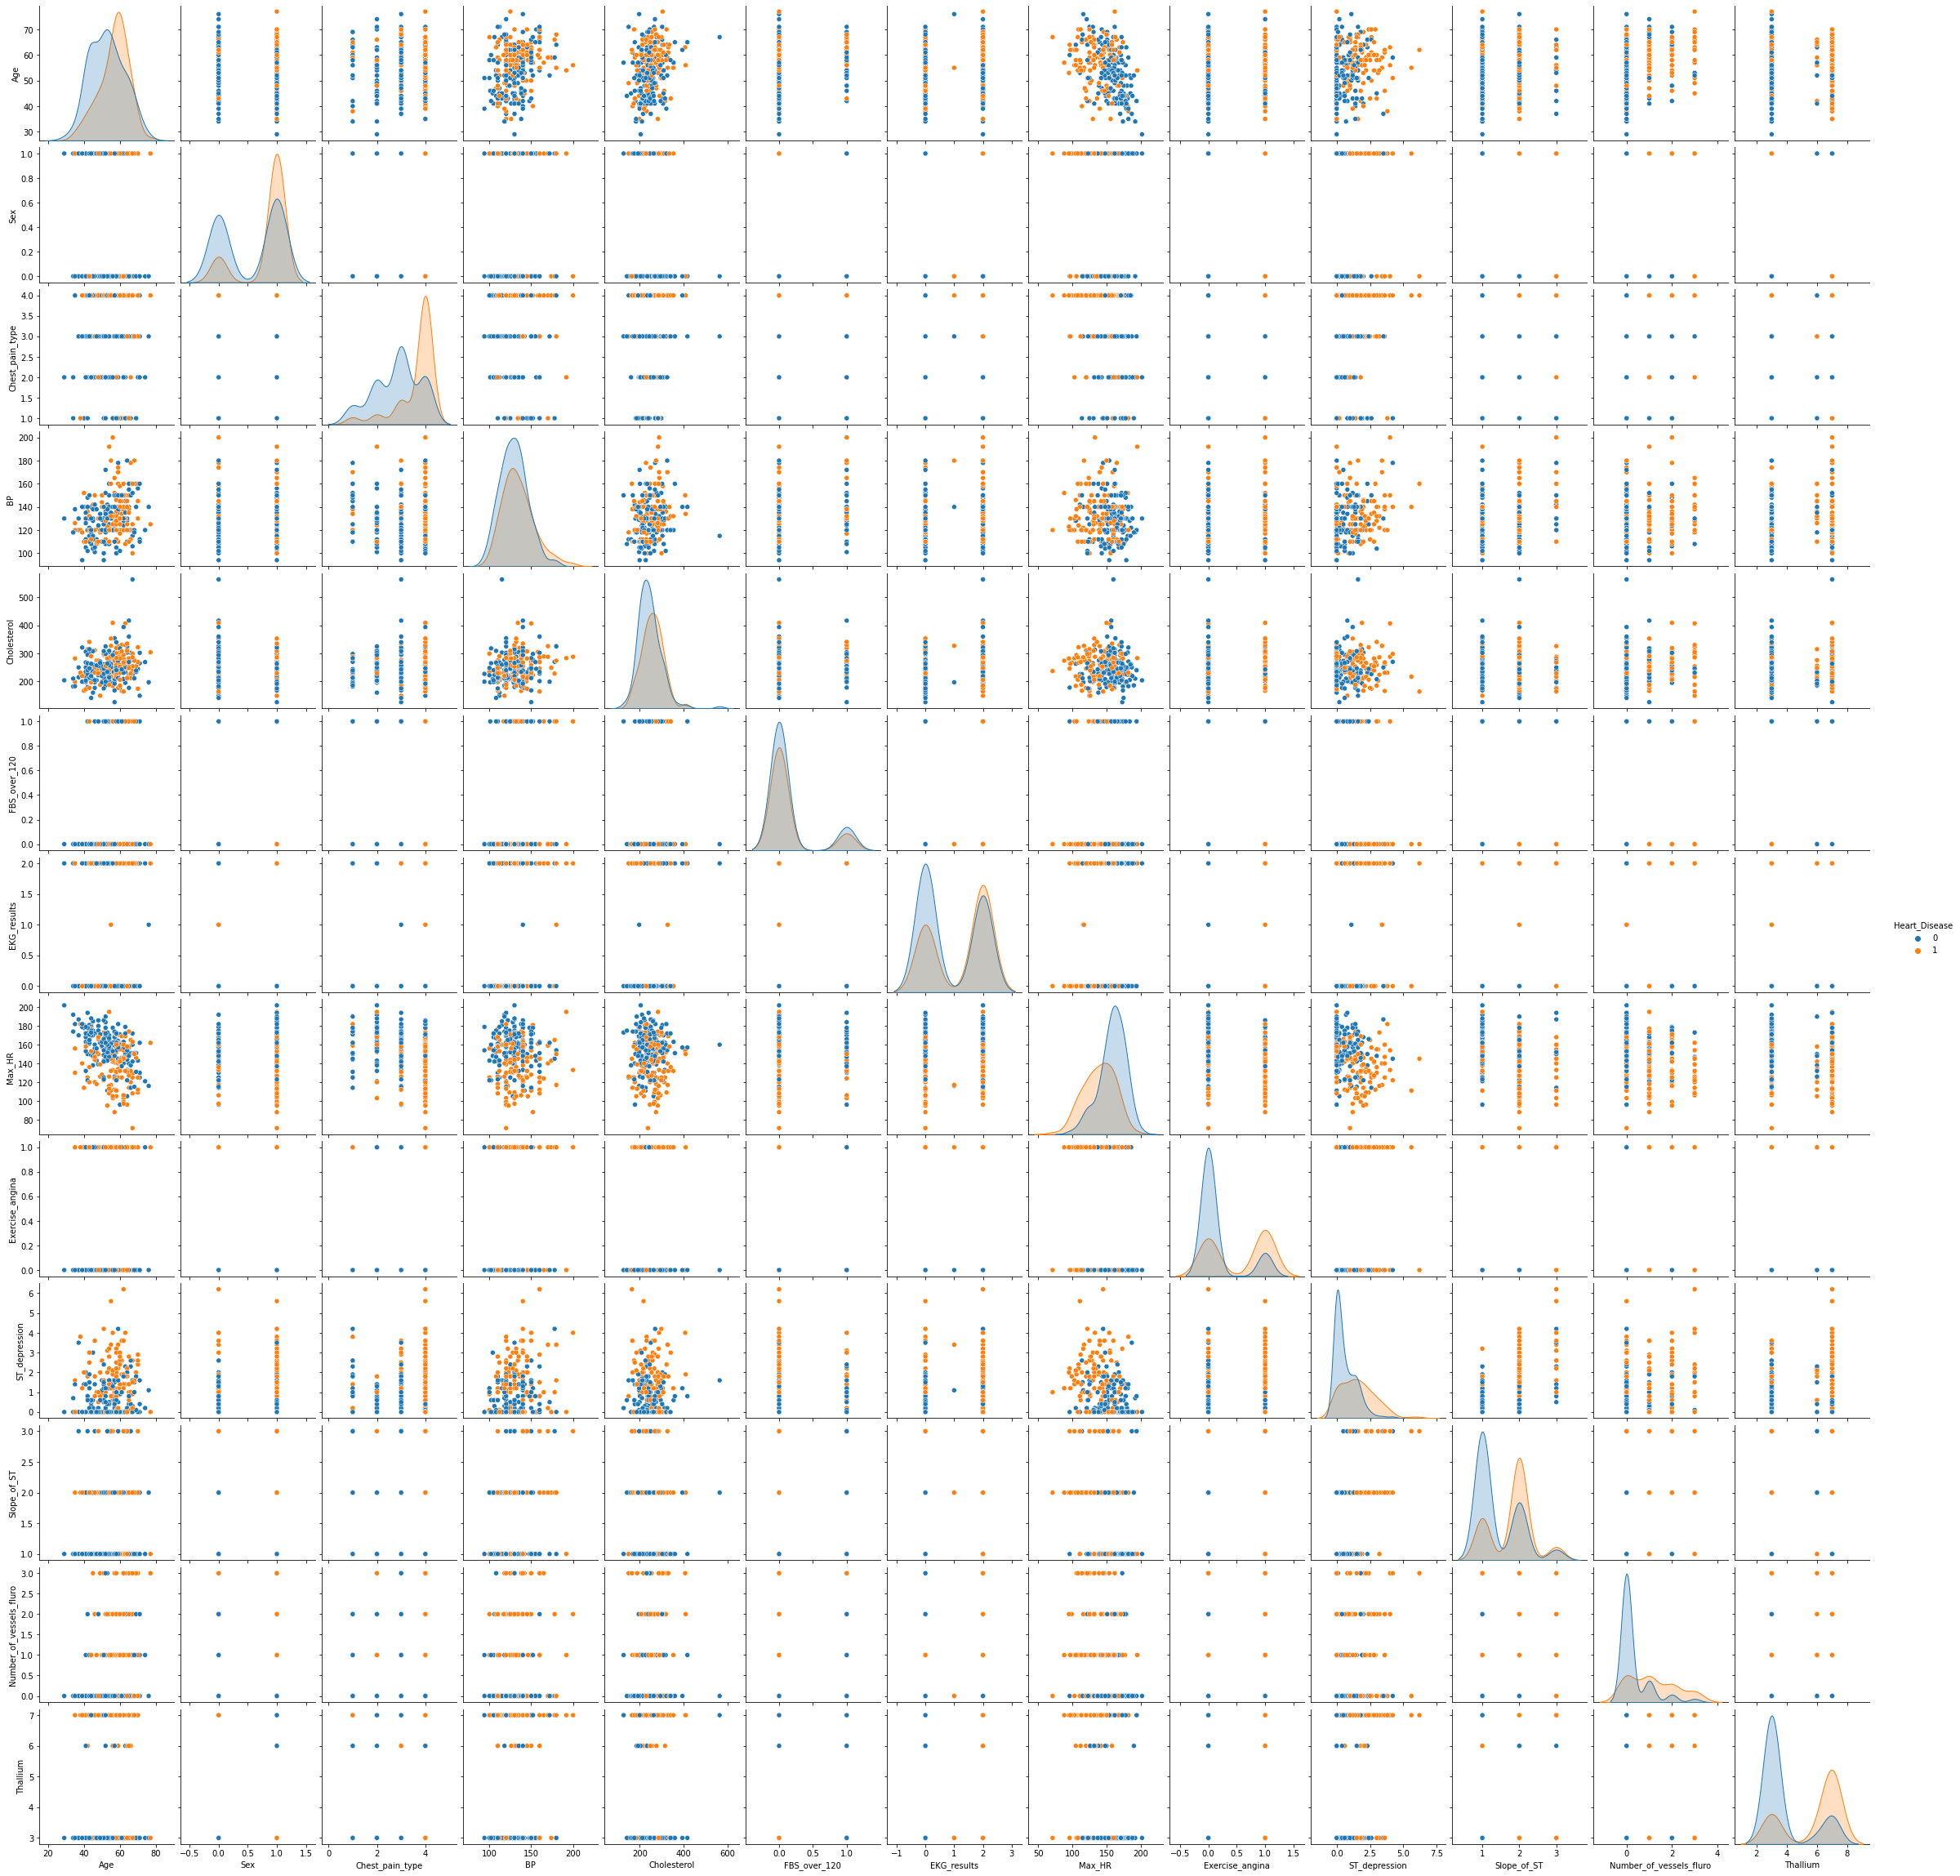

In [11]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='Heart_Disease')

''

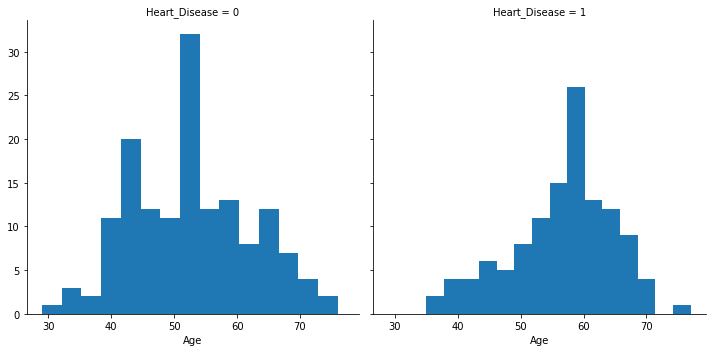

In [12]:
# useful for visualizing the distribution of the data
g = sns.FacetGrid(df, col='Heart_Disease', height=5)
g.map(plt.hist, 'Age', bins=15)
,

In [13]:
# useful for splitting the data into groups and aggregating them using different operators (e.g. sum or size)
# here we split dataset by Sex and get the size (i.e. count) for each group 
df.groupby('Sex').size()

Sex
0     87
1    183
dtype: int64

In [ ]:
# here we split dataset by Sex and get the mean value of other numeric variables for each group 
(df.groupby('Sex')).head()

In [ ]:
# here we split dataset by Pclass and get the mean value of Survived for each group 
# (i.e. the probability of surviving for each Pclass group) 
df[['Sex', 'Heart_Disease']].groupby(['Sex'], as_index=False).mean().sort_values(by='Heart_Disease', ascending=False)

In [ ]:
m = len(y)
X = np.hstack((np.ones((m,1)),X))
print(y.shape)
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1
learning_rate = 0.001

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, learning_rate, 
                                                             iterations,mbs=50)

fig = plt.figure()
plt.xlim(0, 1000)
plt.ylim(0,50)
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()



In [ ]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}

df = df.replace({'Heart_Disease': mapping})
y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120','EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression','Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)


(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations,mbs = 2500)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)


(cost_history, params_optimal) = gradient_descent(X, y, params, 
                                 learning_rate, iterations)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
m = len(y)
n = np.size(X,1)
params = 100*np.ones((n,1))
print(params)
iterations = 900000
learning_rate = 0.001

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/smoke_detection_iot.csv')

df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
df.drop(['Unnamed:_0', 'UTC'],inplace=True, axis=1)
df.columns
y = df['Fire_Alarm']
X = df[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw_H2',
       'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT']]

m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

## LOGISTIC REGRESSION IMPLEMENTION

This section presents the implemention of the Logistic Regression model using the numpy library. The optimization algorithm choose for this work is gradient descent. Two variants of the algorithm were choosen: Batch gradient descent and Mini-batch gradient descent. Additionaly, two optimization algorithms were also implemented in this work: Gradient Descent with Momentum and Adptive Moment Estimation (Adam). 

For theoretical background of the gradient descent algorithms please refer to [Paper 1](https://arxiv.org/pdf/1609.04747.pdf) and [Coursera playlist](https://youtube.com/playlist?list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)

This implementation was previously tested with a synthetic data set [Logistic_Regression_from_scratch](https://github.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/1675e4186924a508dd6a87de1168f652f45e042a/HW1/Logistic_Regression_from_scratch.ipynb).

In [14]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification

In [15]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'

## ALGORITHMS IMPLEMENTED

In [16]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
import time



In [17]:
# First, let's define the sigmoid function for the logistic regression problem
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
# compute_cost: computes the cost using the Binary Cross Entropy function. This 
# function guarantee the cost function to have a convex shape. 
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-6 #infinitesimal value to avoid the indetermined operation log(0)
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon))) # Binary Cross Entropy Function
    return cost

In [19]:
# batch gradient descent: Implement gradient descent algorithm to the whole
# data set. The learning rate and number of interations are required here as 
# inputs. 

def batch_gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        params = params - (learning_rate/m) * (X.T @ dum) #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix

    return (cost_history, params)

In [20]:
# mini batch gradient descent: Splits the data set in mini batches and learn 
# from each mini batch. The learning rate, number of interations and the mini 
# batch size are required here as inputs. 

def mini_batch_gradient_descent(X, y, params, learning_rate, iterations,mbs):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            params = params - (learning_rate/m) * (X_i.T @ dum) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

**batch gradient descent with momentum**: Takes into account the previous gradients, avoiding large oscilations and allowing larger steps in the axis in which it is clear the algorithm is moving towards the minimum. 

In [21]:


def gradient_descent_mom(X, y, params, learning_rate, iterations,Beta1):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    nu = np.zeros((len(params),1))
    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        dJ = (X.T @ dum)/m
        nu = Beta1*nu + (learning_rate) * dJ
        params = params - nu #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix
      
    return (cost_history, params)

In [22]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent_mom(X, y, params, learning_rate, iterations,mbs,Beta1):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    nu = np.zeros((len(params),1))
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            dJ = (X_i.T @ dum)/m
            nu = Beta1*nu + (learning_rate) * dJ
            params = params - nu #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

**mini batch gradient descent with Adam**: Takes into account the previous gradients. Uses the first moment (mean) and second moment (variance) of the gradients to compute the subsequent gradient.

In [23]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent_Adam(X, y, params, learning_rate, iterations,mbs,Beta1,Beta2):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    vt = np.zeros((len(params),1))
    mt = np.zeros((len(params),1))
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            dJ = (X_i.T @ dum)/m
            mt = Beta1*mt + (1-Beta1) * dJ
            vt = Beta2*vt + (1-Beta2) * dJ**2
            mt_ = mt/(1-Beta1**(j+1))
            vt_ = vt/(1-Beta2**(j+1))
            params = params - ((learning_rate) * mt_ / (np.sqrt(vt_) + 10**-6)) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

In [24]:
# Lets define a predict function for new X input data using the optimal parameters
def predict(X, params):
    return np.round(sigmoid(X @ params))

## APPLYING LOGISTIC REGRESSION TO DATA SET

The data set is provided in a .csv format. The following code will take care of the data pre-processing. Pandas library is used to read the data into a DataFrame. The column headers have spaces between words, those spaces are removed for data handling covenience. The presence and absence oh heart disease outcomes are given in string format. This format is change to integers, having a patiente with presence heart disease as 1 and 0 otherwise. After that the data is re format into 2D-numpy arrays. X is the independent variables and y is the dependent variable (heart disease condition). 

In [25]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}

df = df.replace({'Heart_Disease': mapping})
y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
        'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
        'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


**batch gradient descent is implemented**: Here 10000 iterations are used along with a learning rate equal to 0.0001. The execution time is 0.771 s

Time: 0.9063882827758789


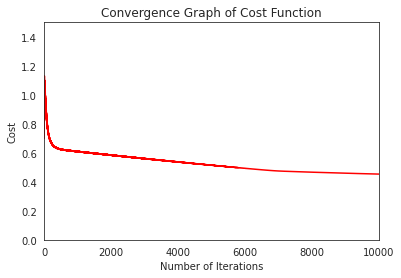

In [28]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim(0, 10000)
plt.ylim(0,1.5)
plt.show()


In [ ]:

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")


In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations,mbs = 271)
end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = gradient_descent_mom(X, y, params, 
                                 learning_rate, iterations,Beta1=0.9)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent_mom(X, y, params, 
                                 learning_rate, iterations,mbs=256,Beta1=0.9)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1)) 
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent_Adam(X, y, params, 
                                 learning_rate, iterations,mbs=256,Beta1=0.9,Beta2=0.999)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()